# Interview Assesment ML Q-5

Q-5. Uber is a taxi service provider as we know, we need to predict the high
booking area using an Unsupervised algorithm and price for the location using a
supervised algorithm and use some map function to display the data
 This is the Dataset You can use this dataset for this question.

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import mean
from numpy import absolute
from numpy import sqrt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from IPython.display import Image
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn import preprocessing,svm
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.pipeline import Pipeline

In [190]:
data=pd.read_csv('rideshare_kaggle.csv')

In [191]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,693071.000000,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000
mean,1544045709.755097,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1544043966.242997,33.457774,1544041609.570159,45.261313,1544047300.031310,29.731002,1544048034.740452,41.997343,1544047993.949826
std,689192.492586,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,691202.767271,6.467224,690195.441406,5.645046,690135.337190,7.110494,687186.191495,6.936841,691077.651976
min,1543203646.000000,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1543161600.000000,15.630000,1543122000.000000,33.510000,1543154400.000000,11.810000,1543136400.000000,28.950000,1543186800.000000
25%,1543443968.000000,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1543420800.000000,30.170000,1543399200.000000,42.570000,1543438800.000000,27.760000,1543399200.000000,36.570000,1543438800.000000
50%,1543737478.000000,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1543770000.000000,34.240000,1543726800.000000,44.680000,1543788000.000000,30.130000,1543744800.000000,40.950000,1543788000.000000
75%,1544827509.000000,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1544806800.000000,38.880000,1544788800.000000,46.910000,1544814000.000000,35.710000,1544788800.000000,44.120000,1544817600.000000
max,1545160511.000000,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1545152400.000000,43.100000,1545192000.000000,57.870000,1545109200.000000,40.050000,1545134400.000000,57.200000,1545109200.000000


Only Price column has some missing rows.

In [192]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=["total","percent"])
missing_data.head()

,total,percent
price,55095,0.079494
id,0,0.000000
ozone,0,0.000000
temperatureLowTime,0,0.000000
apparentTemperatureHigh,0,0.000000


8% data in price column is missing

Let's check how many categorical and numerical columns are present in the data.

In [193]:
len(data._get_numeric_data().columns)

46

Answer: We have total 46 columns as numeric data columns. Remaining 11 are categorical columns.

In [194]:
categorical_cols=data.columns[data.dtypes =='object']
print(categorical_cols)

Index(['id', 'datetime', 'timezone', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'short_summary', 'long_summary', 'icon'],
      dtype='object')


## Data Cleaning and Transformation

We are removing the columns are as follows:

Id: Used only for unique records.
Datetime, Timestamp: As we already have month, day, hour.
Timezone: Only one timezone so we can remove it.
Product_id:Removing product_id as we are considering product name.
Every colum related to weather. Currently not dealing with the weather aspect and hence removing all the related columns.
longitude and latitude: as we have the destination name

In [195]:
data = data.drop(['id', 'datetime', 'timezone', 'timestamp','latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',"product_id",
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime'], axis=1)

Imputing the mean value in place of missing values.

In [183]:
for j in ["price"]:
    data.loc[data.loc[:,j].isnull(),j] = data.loc[:,j].mean()
data.price.isnull().sum()

0

## Exploratory Data Analysis

Let's do some data Exploration via Graph.

We will plot the pairplots for all the columns in the data. Since the pairplot takes forever to run on the entire dataset. we will only take 2000 samples to plot it. Pairplot includes all the scatter plots and histogram of the columns.

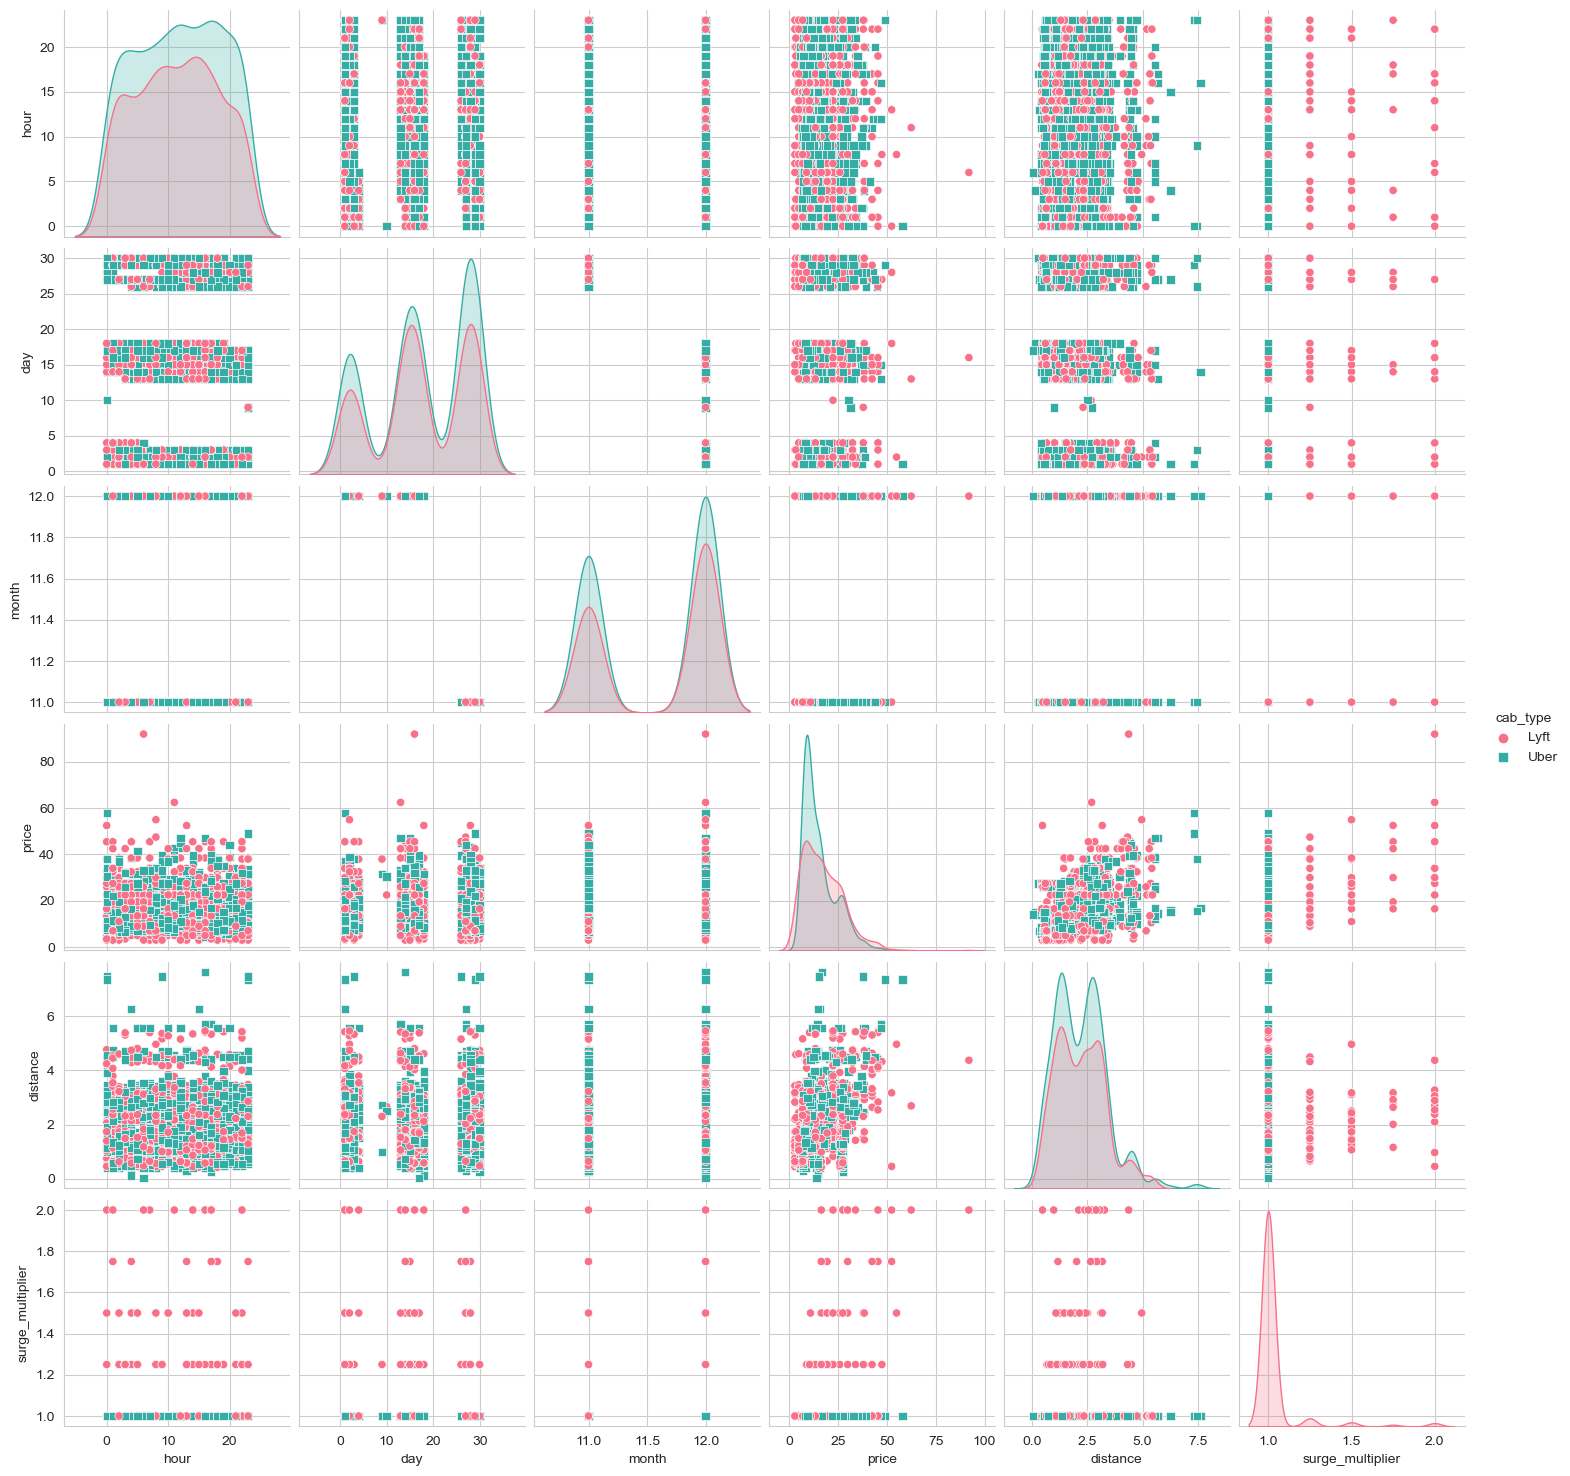

In [196]:
sns_pairplot=sns.pairplot(data.sample(2000), hue="cab_type", markers=["o","s"],diag_kind="kde",kind="scatter",palette="husl")

Observation:

Histograms: Histogram of price, distance and surge_nultiplier column data seems skewed. We need to apply some transformation to make it normally distributed.

Scatter Plot: By looking at the scatter plots, we can see distance vs price and price vs surge_multiplier seems corealted. We will plot correlation matrix further to extract the exact relationships between attribute and labels.

Let's plot the boxplots for checking whether there are outliers in the data or not



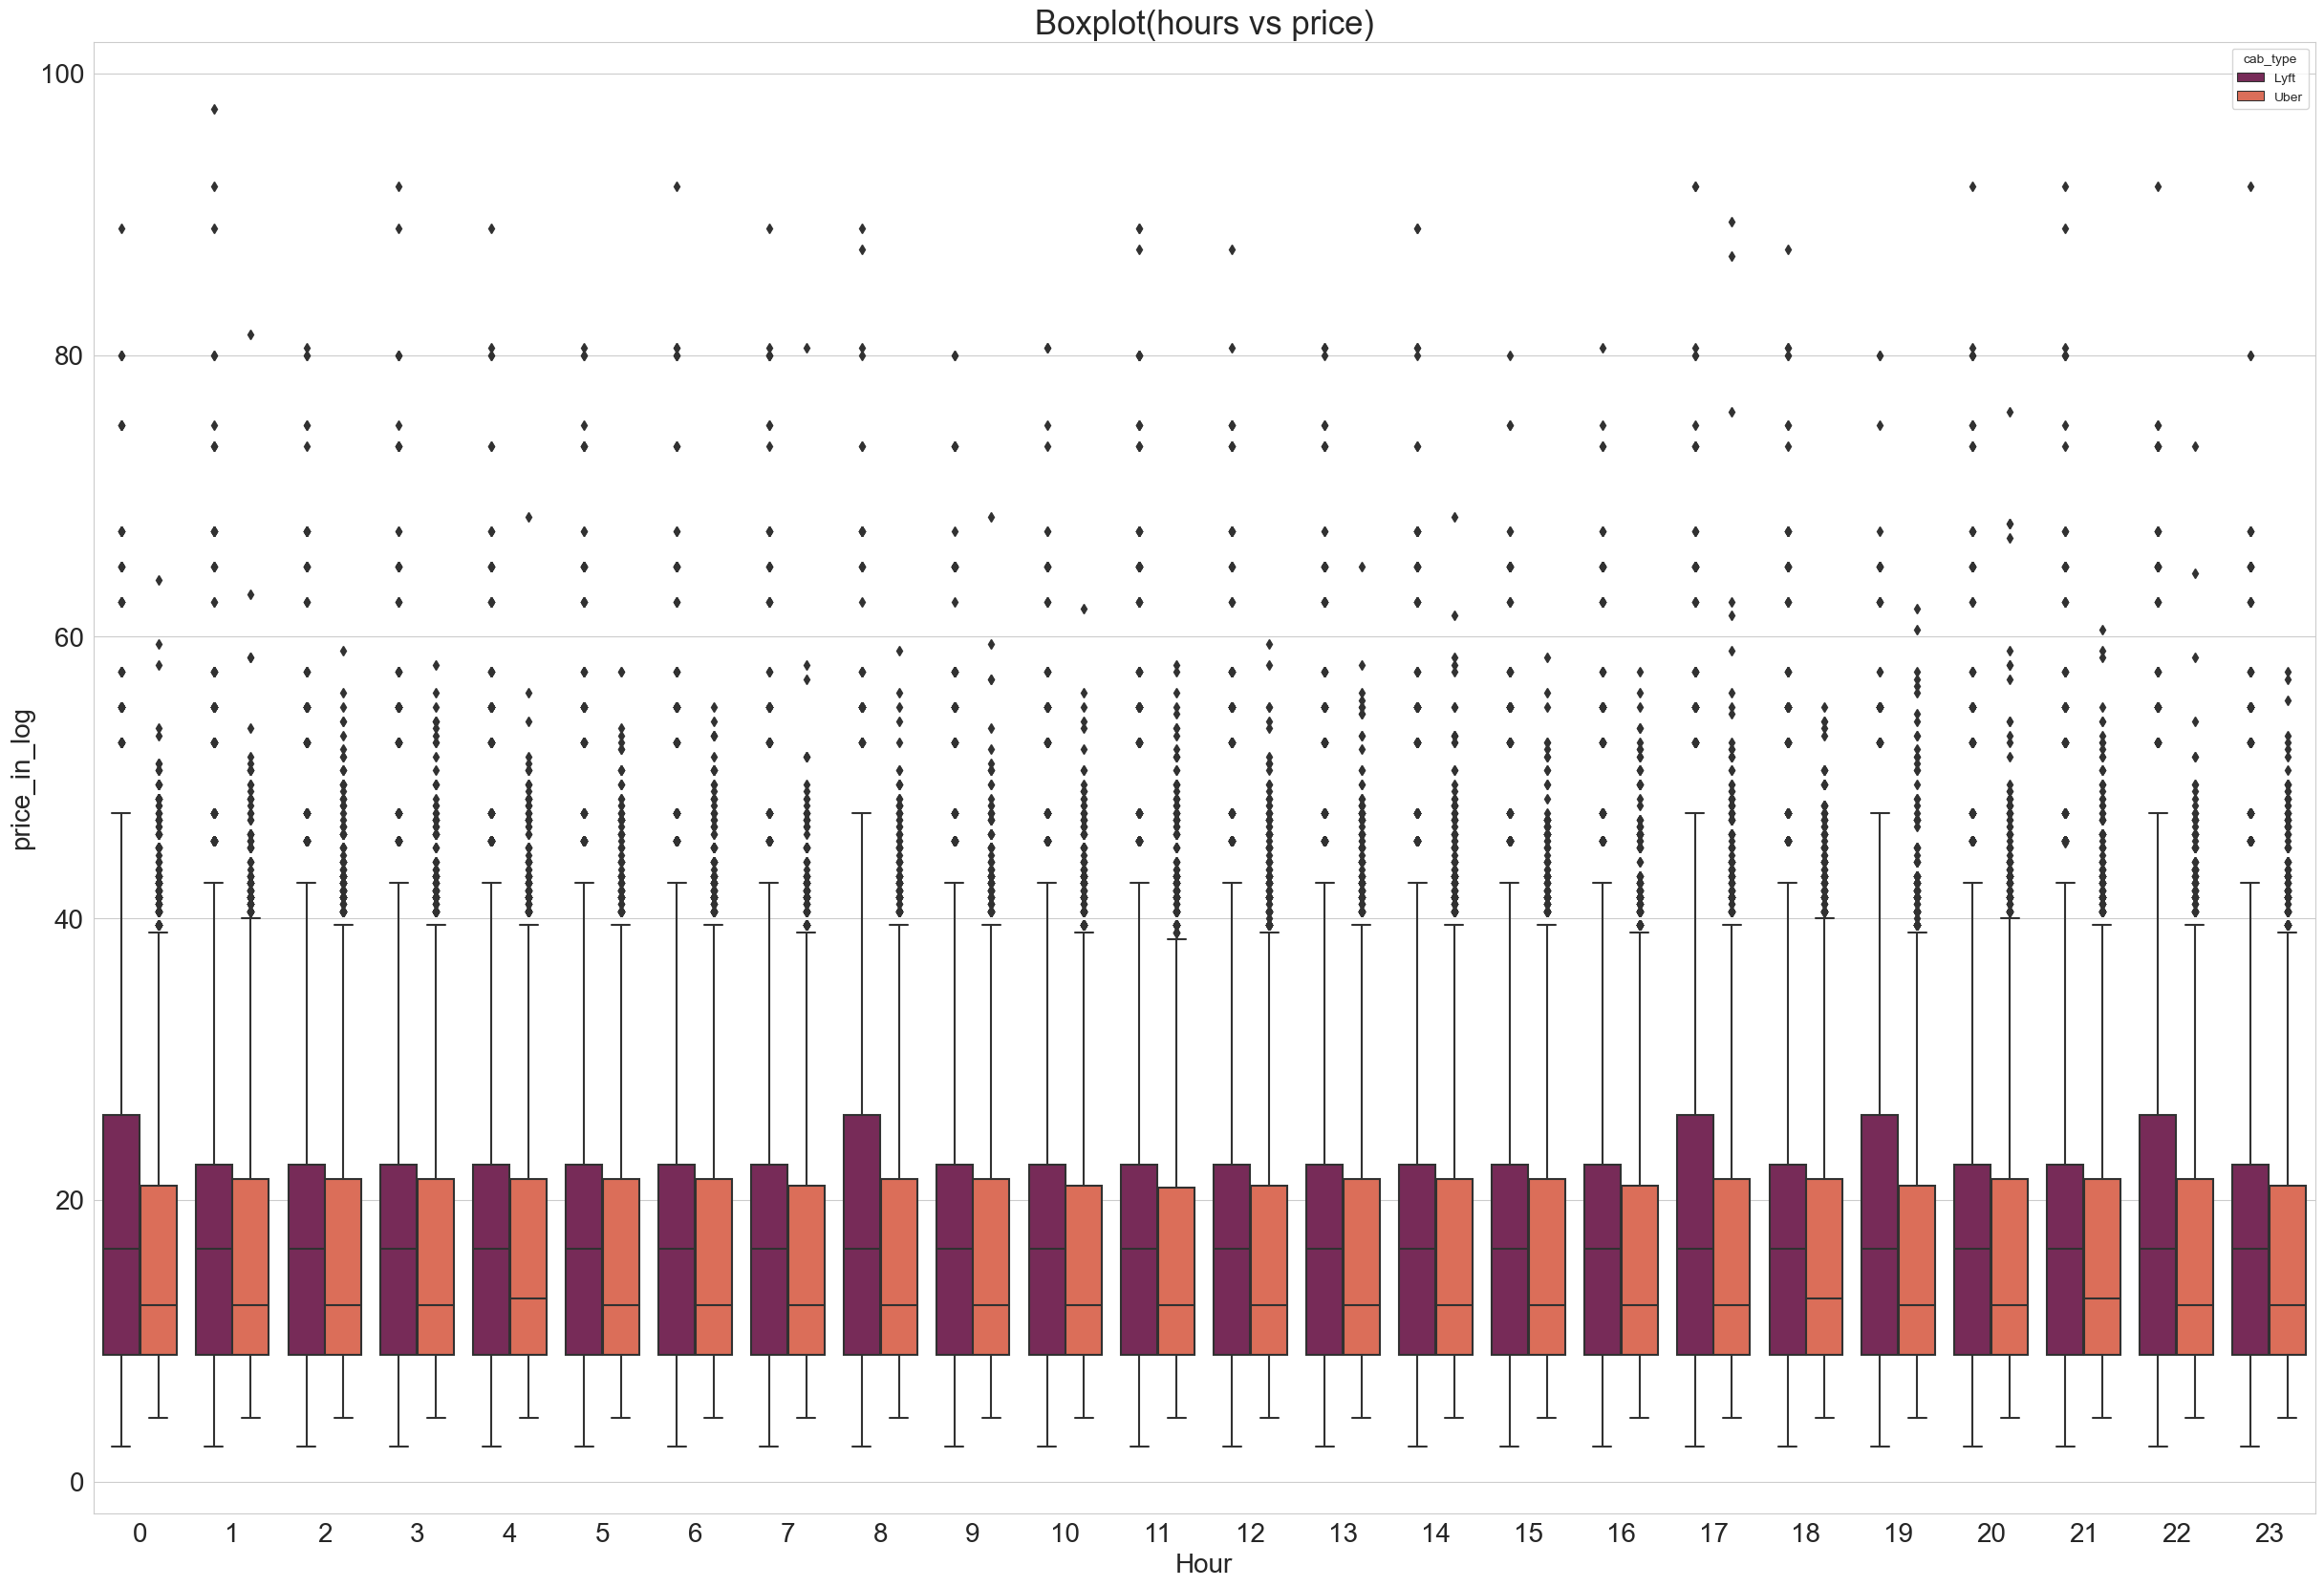

In [197]:
plt.figure(figsize=(30,20))
sns.set_style("whitegrid")
sns.boxplot(x="hour", y="price",data=data, hue="cab_type",palette="rocket")
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.xlabel("Hour",fontsize=20)
plt.ylabel("price_in_log",fontsize=20)
plt.title("Boxplot(hours vs price)",fontsize=25)
plt.show()

Observation:

Price range of lyft is every time higher than uber
There are many outliers present in the data. especially in uber.

Let's work on removing the outliers:

In [198]:
quantiles = stats.mstats.mquantiles(data["price"] , prob=[0.25,0.75])
IQR= stats.iqr(data["price"])
upper = quantiles[1]+(1.5*IQR)
lower = quantiles[0]-(1.5*IQR)
data.loc[data["price"]>upper,"price"]= np.nan
data.loc[data["price"]<lower,"price"]= np.nan
data.price.isnull().sum()

55095

In [199]:
for i in ["price"]:
    data.loc[data.loc[:,i].isnull(),i] = data.loc[:,i].mean()
data.price.isnull().sum()

0

Plotting the PCC for observing the relationaship between columns.

<AxesSubplot:title={'center':'Uber and Lyft Heat Map'}>

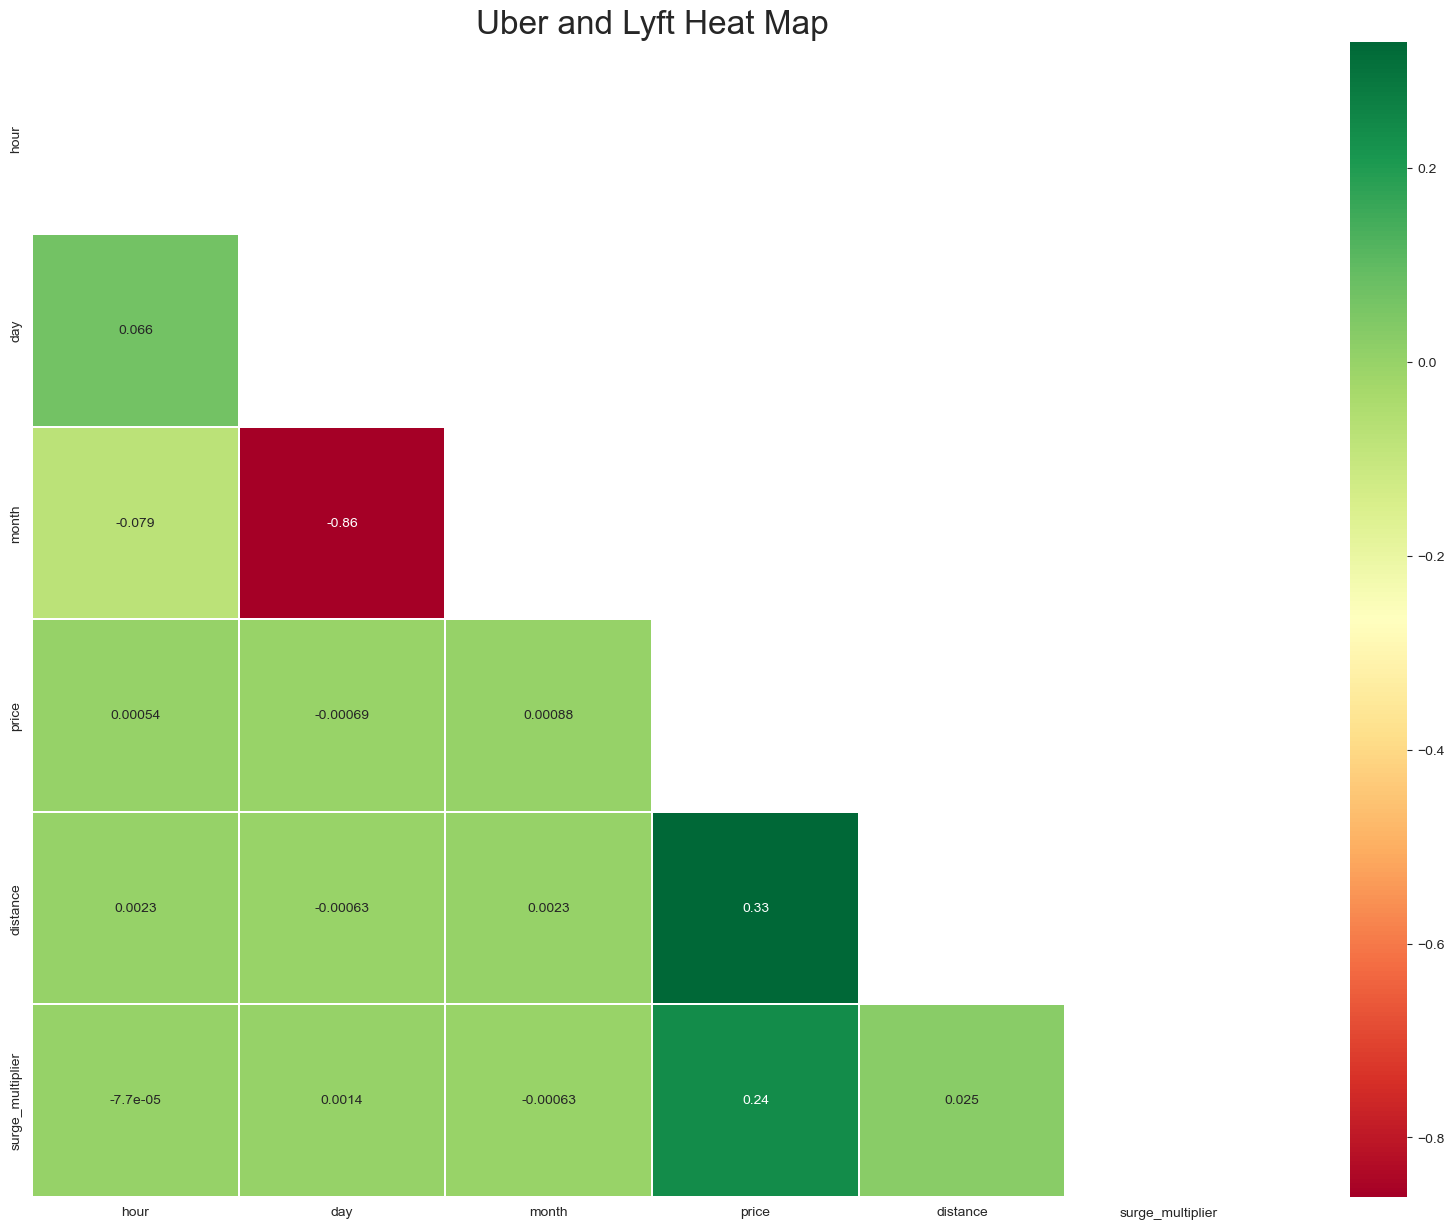

In [200]:
corrmat = data.corr()

fig, ax = plt.subplots(figsize=(20,15))
title = "Uber and Lyft Heat Map"
plt.title(title,fontsize=24)
ttl = ax.title
ttl.set_position([0.5,1.05])
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat,mask=mask,annot=True,cmap='RdYlGn',linewidths=0.20,ax=ax)

Price and surge multiplier highly correlated
Price and distance is correlated
Distance and surge-multiplier is not correlated

## Data Preparation

Extracting categorical columns and numerical columns from the updated dataset:

In [201]:
categorical_cols=data.columns[data.dtypes =='object']
print(categorical_cols)
len(categorical_cols)

Index(['source', 'destination', 'cab_type', 'name'], dtype='object')


4

Let's count the unique values in categorical columns

In [202]:
for i in categorical_cols:
  print(data[i].value_counts())

Financial District         58857
Theatre District           57813
Back Bay                   57792
Boston University          57764
North End                  57763
Fenway                     57757
Northeastern University    57756
South Station              57750
Haymarket Square           57736
West End                   57562
Beacon Hill                57403
North Station              57118
Name: source, dtype: int64
Financial District         58851
Theatre District           57798
Back Bay                   57780
Haymarket Square           57764
Boston University          57764
Fenway                     57757
North End                  57756
Northeastern University    57755
South Station              57749
West End                   57575
Beacon Hill                57403
North Station              57119
Name: destination, dtype: int64
Uber    385663
Lyft    307408
Name: cab_type, dtype: int64
UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
Ta

In [203]:
numeric_cols=data._get_numeric_data().columns
print(numeric_cols)

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier'], dtype='object')


We need to convert categorical columns into numerical columns by one hot encoding and we will perform statndrad scaling on numeric data.

In [205]:
ohe=OneHotEncoder()
data_encode_col = pd.DataFrame(ohe.fit_transform(data[categorical_cols]).toarray(),columns=["encoded_" + x for x in ohe.get_feature_names(categorical_cols)])
data_encode_col.head()
data_other_cols = data.drop(columns=categorical_cols)
data = pd.concat([data_encode_col, data_other_cols], axis=1)

In [206]:
scaler= StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

## Model Training

In [207]:
data.dropna(inplace = True)
X=data.drop(['price'],axis=1)
y=data['price']

instances = X.shape[0]
features = X.shape[1]

# Converting each dataframe into a numpy array since each dataframe contains only one column
X = np.array(X).reshape(-1, features)
y = np.array(y).reshape(-1, 1)

identity_vector = np.asarray([[1 for num in range(instances)]])
identity_vector = identity_vector.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=40)
# print(X_train, X_test, y_train)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
print("Training set mean:", X_train.mean(), y_train.mean())
print("Testing set mean:", X_test.mean(), y_test.mean())
print("Training set standard deviation:", X_train.std(), y_train.std())
print("Testing set standard deviation:", X_test.std(), y_test.std())

Training set shape: (554456, 44) (554456, 1)
Testing set shape: (138615, 44) (138615, 1)
Training set mean: -2.124310478650521e-05 -0.00040182853954647755
Testing set mean: 8.497180613571272e-05 0.001607302562660339
Training set standard deviation: 0.9999617016235108 0.9990238888209918
Testing set standard deviation: 1.0001531732236146 1.0038933173752869


In [208]:
def evaluate_model(test,pred):
    #print(test,pred)
    print("R^2:", r2_score(test, pred))
    print("MAE:", mean_absolute_error(test,pred))
    print("RMSE:",np.sqrt(mean_squared_error(test, pred)))
    print("")
    
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
 
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

def perform_lr(X_train,X_test,train_y, test_y):
    #X_train = np.append(X_train,identity_vector[:X_train.shape[0],:],1)
    #X_test = np.append(X_test,identity_vector[:X_test.shape[0],:],1)
    lr = LinearRegression()
    lr.fit(X_train,train_y)
    y_val_pred = lr.predict(X_test)
    y_train_pred = lr.predict(X_train)

    print('Shape:',X_train.shape)
    print('Rank:',np.linalg.matrix_rank(X_train))
    print('coeff:',lr.coef_)
    #Test linear regression model 
    print("Training Loss")
    evaluate_model(train_y,y_train_pred)
    print("Validation Loss")
    evaluate_model(test_y,y_val_pred)

    
def perform_sgd(X_train,train_y, X_test, test_y,alpha=0.0001, epsilon=0.1, eta0=0.01,penalty=None,learning_rate='invscaling',batchsize=1):
    print("penalty term:",penalty,",learning rate:",learning_rate,",batch size:",batchsize)
#     print(train_y)
    X_train = np.append(X_train,identity_vector[:X_train.shape[0],:],1)
    X_test = np.append(X_test,identity_vector[:X_test.shape[0],:],1)
#     print(X_train.shape)
#     print('Rank:',np.linalg.matrix_rank(X_train))
    model = SGDRegressor(alpha=alpha, epsilon=epsilon, eta0=eta0,penalty=penalty, learning_rate=learning_rate)
    if batchsize > 1:
        batcherator = create_mini_batches(X_train, train_y,batch_size=batchsize)
        for X_chunk, y_chunk in batcherator:
            y_chunk = y_chunk.squeeze(1)
            model.partial_fit(X_chunk, y_chunk)
    else:
        train_y = train_y.squeeze(1)
        model.fit(X_train, train_y)
        
    y_val_predicted = model.predict(X_test)
    print("validation loss")
    evaluate_model(test_y,y_val_predicted)

    y_train_predicted = model.predict(X_train)
    print("training loss")
    evaluate_model(train_y,y_train_predicted)



def perform_pr(X_train,X_test,train_y,test_y):
    p = preprocessing.PolynomialFeatures(degree=2)
    X_train_poly = p.fit_transform(X_train)
    X_test_poly = p.fit_transform(X_test)
    X_train_poly = np.append(X_train,identity_vector[:X_train.shape[0],:],1)
    X_test_poly = np.append(X_test,identity_vector[:X_test.shape[0],:],1)
    pr = LinearRegression()
    pr.fit(X_train_poly,train_y)
    y_val_pred = pr.predict(X_test_poly)
    #Test plynomial regression model 
    print("validation loss") 
    evaluate_model(test_y,y_val_pred)


    
def add_poly(X_train,X_test):
    p = preprocessing.PolynomialFeatures(degree=2)
    X_train_poly = p.fit_transform(X_train[:,:7])
    X_test_poly = p.fit_transform(X_test[:,:7])
    X_train_poly = StandardScaler().fit_transform(X_train_poly)
    X_test_poly = StandardScaler().fit_transform(X_test_poly)
#     print(X_train_poly.shape,X_train[:,8:].shape)
    X_train_poly = np.append(X_train_poly,X_train[:,8:],1)
    X_test_poly = np.append(X_test_poly,X_test[:,8:],1)
    return X_train_poly,X_test_poly
    
def perform_ridge(X_train,train_y,X_test,test_y,alpha=0.5):
    rdg = Ridge(alpha = alpha)
    print("alpha:",alpha)
    rdg.fit(X_train, train_y)
    pred_test_rr= rdg.predict(X_test)
    print("Validation loss")
    evaluate_model(test_y,pred_test_rr)
    y_train_predicted = rdg.predict(X_train)
    print("training loss")
    evaluate_model(train_y,y_train_predicted)

    
def perform_l(X_train,y_train,X_test,test_y,alpha=0.1):
    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(X_train, y_train) 
    pred_train_lasso= model_lasso.predict(X_test)
    print("alpha:",alpha)
    print("validation loss")
    evaluate_model(test_y,pred_train_lasso)
    y_train_predicted = model_lasso.predict(X_train)
    print("training loss")
    evaluate_model(y_train,y_train_predicted)


    
def perform_en(X_train, y_train,X_test,test_y,alpha=0.1,l1=0.5):
    model = ElasticNet(alpha=alpha,l1_ratio=l1)
    model.fit(X_train, y_train) 
    pred_test = model.predict(X_test)
    print("alpha:",alpha,",l1 ratio:",l1)
    print("validation loss")
    evaluate_model(test_y,pred_test)
    pred_train = model.predict(X_train)

    print("alpha:",alpha,",l1 ratio:",l1)
    print("training loss")
    evaluate_model(y_train,pred_train)



    
def k_fold_closed(X_train,y_train):
    model = Ridge(alpha=0.000000000000000000000000000000001)
#     model = LinearRegression()
    pipeline = Pipeline([('transformer', StandardScaler()), ('estimator', model)])
#     pipeline = Pipeline([('transformer', StandardScaler()), ('model', TransformedTargetRegressor(regressor=model,transformer=StandardScaler()))])

    
    cv = KFold(n_splits=4, random_state=20, shuffle=True)
    
    print('Rank:',np.linalg.matrix_rank(X_train))
#     X_train = np.append(X_train,identity_vector[:X_train.shape[0],:],1)
    print('Rank:',np.linalg.matrix_rank(X_train))
    print('Shape:',X_train.shape)
#     X_train = StandardScaler().fit_transform(X_train)
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error',
                             cv=cv, n_jobs=-1)
    print(X_train)
    print(scores)
    #view RMSE
    return sqrt(mean(absolute(scores)))
    
def k_fold_sgd(X_train,train_y):
    cv = KFold(n_splits=4, random_state=1, shuffle=True)
    model = SGDRegressor()
    sgd_x = StandardScaler().fit_transform(X_train)
    sgd_y = train_y.squeeze(1)
    sgd_x = np.append(sgd_x,identity_vector[:sgd_x.shape[0],:],1)
    scores = cross_val_score(model, sgd_x, sgd_y, scoring='neg_mean_absolute_error',
                             cv=cv, n_jobs=-1)
    print(scores)
    #view RMSE
    return sqrt(mean(absolute(scores)))
    

In [209]:
#Train model using linear regression(closed form)
perform_lr(X_train,X_test,y_train, y_test)

Shape: (554456, 44)
Rank: 38
coeff: [[-1.36402943e+09 -1.35984716e+09  1.05291699e+09  1.05285899e+09
  -1.37538601e+09  1.05268497e+09  1.05290871e+09 -1.35677126e+09
   1.05285071e+09  1.05280099e+09 -1.36425468e+09 -1.36155886e+09
  -7.29833025e+10 -7.27663953e+10 -7.05574698e+10 -7.05535832e+10
  -7.35944869e+10 -7.05574698e+10 -7.05530279e+10 -7.26023800e+10
  -7.05524726e+10 -7.05491409e+10 -7.29936357e+10 -7.28654708e+10
   1.76019121e+10 -4.79432887e+11  1.12594825e+11  1.12595759e+11
  -1.52863513e+11 -1.52863513e+11 -1.52863513e+11 -1.52863513e+11
  -1.52863513e+11 -1.52860768e+11  1.12594825e+11  1.12591091e+11
   1.12593892e+11  1.12595759e+11  1.12595759e+11 -3.49790425e-05
  -8.59520960e-04 -5.61551554e-04  3.34993085e-01  1.89427697e-01]]
Training Loss
R^2: 0.918863188530346
MAE: 0.20075280815039848
RMSE: 0.28456720063779944

Validation Loss
R^2: 0.9177748128999865
MAE: 0.2021866666064437
RMSE: 0.2878657516310026



Observation (Linear regression closed form): There is not much difference between training and validation loss. This indicates that model is performing reasonably well. It's not underfitting or overfitting with dataset.

In [210]:
perform_sgd(X_train,y_train, X_test, y_test,penalty='elasticnet',learning_rate='constant',batchsize=5)
perform_sgd(X_train,y_train, X_test, y_test,penalty='l1',learning_rate='optimal',batchsize=10)
perform_sgd(X_train,y_train, X_test, y_test,penalty='l2',learning_rate='adaptive',batchsize=100)
perform_sgd(X_train,y_train, X_test, y_test,penalty='l2',learning_rate='invscaling',batchsize=50)
perform_sgd(X_train,y_train, X_test, y_test)

penalty term: elasticnet ,learning rate: constant ,batch size: 5
validation loss
R^2: 0.8841917190535652
MAE: 0.2459982950104464
RMSE: 0.3416310775440898

training loss
R^2: 0.8852446740078008
MAE: 0.24455647190825933
RMSE: 0.33842489184037716

penalty term: l1 ,learning rate: optimal ,batch size: 10
validation loss
R^2: 0.8443433074474915
MAE: 0.2980017626121965
RMSE: 0.39606955676448946

training loss
R^2: 0.8445988344974004
MAE: 0.2968823684779269
RMSE: 0.3938247528254053

penalty term: l2 ,learning rate: adaptive ,batch size: 100
validation loss
R^2: 0.8923795451733936
MAE: 0.2431323968360451
RMSE: 0.3293327911130265

training loss
R^2: 0.8934587611573922
MAE: 0.24145793924133924
RMSE: 0.3260879454469892

penalty term: l2 ,learning rate: invscaling ,batch size: 50
validation loss
R^2: 0.9171940542912721
MAE: 0.2020907078851385
RMSE: 0.2888805644709479

training loss
R^2: 0.9182853961450863
MAE: 0.20074501896308114
RMSE: 0.2855786347670235

penalty term: None ,learning rate: invscal

Observation (Linear regression SGD): Stocastic Gredient descent (SGD) method is observed with different learning rate and batch sizes:

Constant learning Rate and elasticnet penalty with batch size 5: Constant learning rate is giving almost 0.43 rmse which is more than closed form solution. We can definitely improve it with optimum hyperparameter tuning.

Optimal learning rate and l1 penalty with batch size 10: Looking at the evaluation metrics seems like model is slightly overfitting than other combinations of hyperparameter.Optimal learning rate is not suitable for the dataset with small batch size. A high learning rate can cause the model to converge too quickly and overshoot the optimal parameters, leading to overfitting. Penalty l1 is not really helping here to prevent the overfitting

penalty term l2 ,learning rate adaptive ,batch size 100: The RMSE value of 0.45 suggests that, on average, the model's predictions are off by around 0.45 units of the target variable. The R-squared value of 0.79 indicates that the model fits the data poorly and is not able to explain much of the variance in the target variable.

penalty term l2 ,learning rate invscaling ,batch size 50 : invscaling learning rate is actually suitable for this dataset because it helps to prevent overshooting the optimal parameters in the early stage of training. Batch size 50 is not small but optimal for this dataset. l2 regression is helping more to prevent the overfitting of the dataset. Although, Reducing batch size will reduce rmse more and gives the better result.

penalty term None ,learning rate invscaling ,batch size 1 : With invscaling learning rate and smaller batch size these parameters gives best results.

linear regression closed form solution is performing almost similar like SGD linear regression.

In [211]:
#Train model using polynomial regression(Closed form)

perform_pr(X_train,X_test, y_train,y_test)

validation loss
R^2: 0.9177771411076626
MAE: 0.20218129498971665
RMSE: 0.2878616761401428



Observation (Polynomial Regression closed form): Polynomial regression performing similar results as linear regression which indicates that there is not non-linear relationship in the data between labels and attributes

In [212]:
#Train model using polynomial regression(SGD)

#Add polynomial features
X_train_poly,X_test_poly = add_poly(X_train,X_test)

perform_sgd(X_train_poly,y_train, X_test_poly, y_test,penalty='elasticnet',learning_rate='constant',batchsize=5)
perform_sgd(X_train_poly,y_train, X_test_poly, y_test,penalty='l1',learning_rate='optimal',batchsize=10)
perform_sgd(X_train_poly,y_train, X_test_poly, y_test,penalty='l2',learning_rate='adaptive',batchsize=100)
perform_sgd(X_train_poly,y_train, X_test_poly, y_test)

penalty term: elasticnet ,learning rate: constant ,batch size: 5
validation loss
R^2: 0.7210535410893486
MAE: 0.34964884323916173
RMSE: 0.5302100917082911

training loss
R^2: 0.7199315980822448
MAE: 0.3490831461456726
RMSE: 0.528698319430826

penalty term: l1 ,learning rate: optimal ,batch size: 10
validation loss
R^2: 0.6125927993826348
MAE: 0.49503925145173455
RMSE: 0.6248437174812121

training loss
R^2: 0.6087425968524771
MAE: 0.4952804682830413
RMSE: 0.6248951547937358

penalty term: l2 ,learning rate: adaptive ,batch size: 100
validation loss
R^2: 0.793345863981157
MAE: 0.3352607603800561
RMSE: 0.45636214648304996

training loss
R^2: 0.7940520828496539
MAE: 0.33387792513475856
RMSE: 0.4533718752278742

penalty term: None ,learning rate: invscaling ,batch size: 1
validation loss
R^2: 0.916037144171834
MAE: 0.20414628819892286
RMSE: 0.2908915891210713

training loss
R^2: 0.9170648745943395
MAE: 0.20275113908875309
RMSE: 0.2877034873260809



Observation (polynomial regression SGD): Polynomial regression is performing similar way as linear regression. Seems like there no non-linear relationship between labels and attributes.

In case of polynomial regression, only invscaling learning rate and smallest batch size produces best results. Any other batch size more than 1 and learning rate like constant , optimal and adaptive is making the model overfitting to this dataset

In [214]:
#Implement k fold with closed form using linear regression model
k_fold_closed(X_train, y_train)
#Implement k fold with sgd using linear regression model
k_fold_sgd(X_train,y_train)

Rank: 38
Rank: 38
Shape: (554456, 44)
[[-0.30161408 -0.30050529 -0.30153436 ...  0.83934123 -0.46484585
  -0.15134887]
 [ 3.31549508 -0.30050529 -0.30153436 ...  0.83934123 -0.42094524
  -0.15134887]
 [-0.30161408 -0.30050529 -0.30153436 ...  0.83934123 -0.95653276
  -0.15134887]
 ...
 [-0.30161408 -0.30050529 -0.30153436 ... -1.19141056 -0.90385202
  -0.15134887]
 [-0.30161408 -0.30050529 -0.30153436 ... -1.19141056 -0.39460487
  -0.15134887]
 [-0.30161408 -0.30050529 -0.30153436 ...  0.83934123 -0.01705956
  -0.15134887]]
[-0.20033997 -0.20065718 -0.20057942 -0.20116119]
[-0.20149517 -0.20064616 -0.20125805 -0.20238156]


0.4488265093653306

Observation (K-fold linear regression): K-fold cross-validation with SGD is a more robust approach to evaluating the performance of a linear regression model than a standard linear regression model, but it can also increase the variance of the estimated performance, leading to a higher RMSE. In our case there is a large variation in the performance of the model across the folds. And hence k-fold rmse is higher than standard linear regression model rmse.

In [215]:
#Implement k fold with sgd using polynomial regression model

k_fold_closed(X_train_poly, y_train)
#Implement k fold with sgd using polynomial regression model

k_fold_sgd(X_train_poly,y_train)

Rank: 39
Rank: 39
Shape: (554456, 72)
[[ 0.         -0.30203546 -0.3007894  ...  0.83934123 -0.46484585
  -0.15134887]
 [ 0.          3.31086954 -0.3007894  ...  0.83934123 -0.42094524
  -0.15134887]
 [ 0.         -0.30203546 -0.3007894  ...  0.83934123 -0.95653276
  -0.15134887]
 ...
 [ 0.         -0.30203546 -0.3007894  ... -1.19141056 -0.90385202
  -0.15134887]
 [ 0.         -0.30203546 -0.3007894  ... -1.19141056 -0.39460487
  -0.15134887]
 [ 0.         -0.30203546 -0.3007894  ...  0.83934123 -0.01705956
  -0.15134887]]
[-0.20062995 -0.20104584 -0.20123825 -0.20079717]
[-0.20316077 -0.20190767 -0.20132722 -0.20122593]


0.449338848294637

Observation (K-fold polynomial regression):

K-fold linear regression is similar to k-fold polynomial regression. Both performing more or less same results with or without sgd.

## Regularization Of Linear Model

In [216]:
perform_ridge(X_train,y_train,X_test,y_test,alpha=0.000000001)
perform_ridge(X_train,y_train,X_test,y_test,alpha=0.5)
perform_ridge(X_train,y_train,X_test,y_test,alpha=5)
perform_ridge(X_train,y_train,X_test,y_test,alpha=1000)

alpha: 1e-09
Validation loss
R^2: 0.9177784509699518
MAE: 0.20209741342102316
RMSE: 0.28785938322147714

training loss
R^2: 0.9188695391165017
MAE: 0.20065957772869744
RMSE: 0.2845560638685869

alpha: 0.5
Validation loss
R^2: 0.9177784499602968
MAE: 0.20209733376829467
RMSE: 0.28785938498888897

training loss
R^2: 0.918869539115793
MAE: 0.20065949734004282
RMSE: 0.2845560638698296

alpha: 5
Validation loss
R^2: 0.9177784408096655
MAE: 0.20209661708125434
RMSE: 0.2878594010071652

training loss
R^2: 0.9188695390456411
MAE: 0.20065877386975753
RMSE: 0.2845560639928549

alpha: 1000
Validation loss
R^2: 0.9177736129710572
MAE: 0.20194155864274113
RMSE: 0.28786785206515886

training loss
R^2: 0.9188667174064054
MAE: 0.20050227253634526
RMSE: 0.28456101224265173



Observation (ridge): Ridge regression in not improving the performance significantly. But seems like it resulting a model with minimum rmse than any other combination

In [217]:
#Perform Regularization(Lasso)
  
perform_l(X_train, y_train,X_test,y_test,alpha=0.0000000001)
perform_l(X_train, y_train,X_test,y_test,alpha=0.1)
perform_l(X_train, y_train,X_test,y_test,alpha=5)
perform_l(X_train, y_train,X_test,y_test,alpha=100)

alpha: 1e-10
validation loss
R^2: 0.9177784509717024
MAE: 0.20209741338263948
RMSE: 0.2878593832184126

training loss
R^2: 0.9188695391165017
MAE: 0.20065957769141815
RMSE: 0.2845560638685869

alpha: 0.1
validation loss
R^2: 0.8104988792178465
MAE: 0.3314772845934619
RMSE: 0.4370120927816211

training loss
R^2: 0.8117516845648891
MAE: 0.32987739432630825
RMSE: 0.43345241056723066

alpha: 5
validation loss
R^2: -4.005358806846715e-06
MAE: 0.7804857590074753
RMSE: 1.0038953278497438

training loss
R^2: 0.0
MAE: 0.7766515142821104
RMSE: 0.9990238888209918

alpha: 100
validation loss
R^2: -4.005358806846715e-06
MAE: 0.7804857590074753
RMSE: 1.0038953278497438

training loss
R^2: 0.0
MAE: 0.7766515142821104
RMSE: 0.9990238888209918



Observation (Lasso): Lasso regression is not really improving the performance, It is actually decreasing with increasing value of alpha. for smaller value of alpha the results are more or less similar

In [218]:
#Perform Regularization(Elastic net)
    
perform_en(X_train, y_train,X_test,y_test,alpha=0.0000000001,l1=0.5)
perform_en(X_train, y_train,X_test,y_test,alpha=0.1,l1=0.8)
perform_en(X_train, y_train,X_test,y_test,alpha=5,l1=0.5)
perform_en(X_train, y_train,X_test,y_test,alpha=100,l1=0.2)

alpha: 1e-10 ,l1 ratio: 0.5
validation loss
R^2: 0.9177784509707875
MAE: 0.20209741339767454
RMSE: 0.28785938322001425

alpha: 1e-10 ,l1 ratio: 0.5
training loss
R^2: 0.9188695391165017
MAE: 0.20065957770587103
RMSE: 0.2845560638685869

alpha: 0.1 ,l1 ratio: 0.8
validation loss
R^2: 0.8416444771654119
MAE: 0.296655272554221
RMSE: 0.3994883975687067

alpha: 0.1 ,l1 ratio: 0.8
training loss
R^2: 0.842973497199135
MAE: 0.2950972482167302
RMSE: 0.39587889785268177

alpha: 5 ,l1 ratio: 0.5
validation loss
R^2: -4.005358806846715e-06
MAE: 0.7804857590074753
RMSE: 1.0038953278497438

alpha: 5 ,l1 ratio: 0.5
training loss
R^2: 0.0
MAE: 0.7766515142821104
RMSE: 0.9990238888209918

alpha: 100 ,l1 ratio: 0.2
validation loss
R^2: -4.005358806846715e-06
MAE: 0.7804857590074753
RMSE: 1.0038953278497438

alpha: 100 ,l1 ratio: 0.2
training loss
R^2: 0.0
MAE: 0.7766515142821104
RMSE: 0.9990238888209918



Observation(elastic net): Elasticnet is behaving similar like lasso regression. Performance is getting worse at increase value of alpha.

## Regularization of Polynomial Model

In [219]:
#Perform Regularization(Ridge)
perform_ridge(X_train_poly,y_train,X_test_poly,y_test,alpha=0)
perform_ridge(X_train_poly,y_train,X_test_poly,y_test,alpha=0.000000001)
perform_ridge(X_train_poly,y_train,X_test_poly,y_test,alpha=0.5)
perform_ridge(X_train_poly,y_train,X_test_poly,y_test,alpha=5)
perform_ridge(X_train_poly,y_train,X_test_poly,y_test,alpha=1000)

alpha: 0
Validation loss
R^2: -1.5809743690525314e+21
MAE: 22375216802.535706
RMSE: 39916272412.35913

training loss
R^2: 0.9186027500468715
MAE: 0.20110787897458013
RMSE: 0.28502354635472066

alpha: 1e-09
Validation loss
R^2: 0.9177783746662328
MAE: 0.2020978866480005
RMSE: 0.2878595167919137

training loss
R^2: 0.9188695391165017
MAE: 0.200659577728683
RMSE: 0.28455606386858684

alpha: 0.5
Validation loss
R^2: 0.917778399346062
MAE: 0.20209858126811986
RMSE: 0.2878594735896283

training loss
R^2: 0.9188695391157975
MAE: 0.20065949738379601
RMSE: 0.28455606386982185

alpha: 5
Validation loss
R^2: 0.9177783901668338
MAE: 0.20209786574618901
RMSE: 0.28785948965795893

training loss
R^2: 0.9188695390460837
MAE: 0.20065877430770243
RMSE: 0.28455606399207856

alpha: 1000
Validation loss
R^2: 0.9177735752878541
MAE: 0.2019430594148005
RMSE: 0.28786791802805645

training loss
R^2: 0.9188667343647106
MAE: 0.20050238802297612
RMSE: 0.2845609825034831



Observation: Ridge regression is not improving performance significantly in polynomial linear regression. The rmse is reducing with increasing alpha.

In [220]:
#Perform Regularization(Lasso)
  
perform_l(X_train_poly,y_train,X_test_poly,y_test,alpha=0.0000000001)
perform_l(X_train_poly,y_train,X_test_poly,y_test,alpha=0.1)
perform_l(X_train_poly,y_train,X_test_poly,y_test,alpha=5)
perform_l(X_train_poly,y_train,X_test_poly,y_test,alpha=100)

alpha: 1e-10
validation loss
R^2: 0.917778405835812
MAE: 0.2020989352919468
RMSE: 0.28785946222925546

training loss
R^2: 0.9188695391165017
MAE: 0.20065957768693085
RMSE: 0.2845560638685869

alpha: 0.1
validation loss
R^2: 0.8104988792178465
MAE: 0.3314772845934619
RMSE: 0.4370120927816211

training loss
R^2: 0.8117516845648891
MAE: 0.32987739432630825
RMSE: 0.43345241056723066

alpha: 5
validation loss
R^2: -4.005358806846715e-06
MAE: 0.7804857590074753
RMSE: 1.0038953278497438

training loss
R^2: 0.0
MAE: 0.7766515142821104
RMSE: 0.9990238888209918

alpha: 100
validation loss
R^2: -4.005358806846715e-06
MAE: 0.7804857590074753
RMSE: 1.0038953278497438

training loss
R^2: 0.0
MAE: 0.7766515142821104
RMSE: 0.9990238888209918



observation: lasso is behaving similarly with polynomial regression as linear regression.

In [223]:
#Perform Regularization(Elastic net)
    
perform_en(X_train_poly,y_train,X_test_poly,y_test,alpha=0.0000000001,l1=0.5)
perform_en(X_train_poly,y_train,X_test_poly,y_test,alpha=0.1,l1=0.8)
perform_en(X_train_poly,y_train,X_test_poly,y_test,alpha=5,l1=0.5)
perform_en(X_train_poly,y_train,X_test_poly,y_test,alpha=100,l1=0.2)

alpha: 1e-10 ,l1 ratio: 0.5
validation loss
R^2: 0.9177784058360423
MAE: 0.20209893532806542
RMSE: 0.2878594622288524

alpha: 1e-10 ,l1 ratio: 0.5
training loss
R^2: 0.9188695391165017
MAE: 0.2006595777036071
RMSE: 0.2845560638685869

alpha: 0.1 ,l1 ratio: 0.8
validation loss
R^2: 0.8416444724349906
MAE: 0.2966552768295082
RMSE: 0.399488403535497

alpha: 0.1 ,l1 ratio: 0.8
training loss
R^2: 0.8429734927477901
MAE: 0.2950972520846712
RMSE: 0.39587890346381577

alpha: 5 ,l1 ratio: 0.5
validation loss
R^2: -4.005358806846715e-06
MAE: 0.7804857590074753
RMSE: 1.0038953278497438

alpha: 5 ,l1 ratio: 0.5
training loss
R^2: 0.0
MAE: 0.7766515142821104
RMSE: 0.9990238888209918

alpha: 100 ,l1 ratio: 0.2
validation loss
R^2: -4.005358806846715e-06
MAE: 0.7804857590074753
RMSE: 1.0038953278497438

alpha: 100 ,l1 ratio: 0.2
training loss
R^2: 0.0
MAE: 0.7766515142821104
RMSE: 0.9990238888209918



observation: elastic net is also similar with polynomial regression as it is with linear regression.

## Final Thoughts
There is not much model performance metrics difference with different hyperparameter combinations. The rmse is more or less similar for the dataset. Linear and polynomial is also performing in similar manner. With SGD and closed form I have observed similar performance for this dataset. K-fold gives robust model but high variablity due to diversity in the dataset.

I would go with ridge regression linear model as my final model for this dataset.